<h1 style="text-align: center;">Sales Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Importing and cleaning the dataset

#### 1.1 Importing

 **Goal**: Merge 12 monthly sales datasets into one master dataset to facilitate analysis.
- **Approach**: 
    - Load the sales data for each month using Pandas' `read_csv` function.
    - Add a `Month` column to each dataset indicating the month number (1 for January, 2 for February, etc.).
    - Use Pandas' `merge` function to combine all the datasets into one, using the `Month` column as the common key.
    - Save the resulting master dataset to a CSV file using Pandas' `to_csv` function.

In [2]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
df = pd.read_csv(f'./Sales_Data/Sales_{months[0]}_2019.csv')
df['Month'] = 1
for i in range(1,len(months)):
    df1 = pd.read_csv(f'./Sales_Data/Sales_{months[i]}_2019.csv')
    df1['Month'] = i + 1
    df = df.merge(df1, how='outer')

df.to_csv('all_data.csv', index=False)

In [3]:
df = pd.read_csv('all_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186850 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


#### 1.2 Null Values By Column


- **Goal**: Visualize the number of null values in each column of the sales data.
- **Approach**:
    - Calculate the number of null values in each column of the dataset using the `isna` and `sum` functions in Pandas.
    - Create a bar chart using Matplotlib's `bar` function, with the column names on the x-axis and the number of null values on the y-axis.
    - Customize the chart using various functions, including `set_xticks`, `set_xticklabels`, `set_ylabel`, `set_xlabel`, and `set_title`.

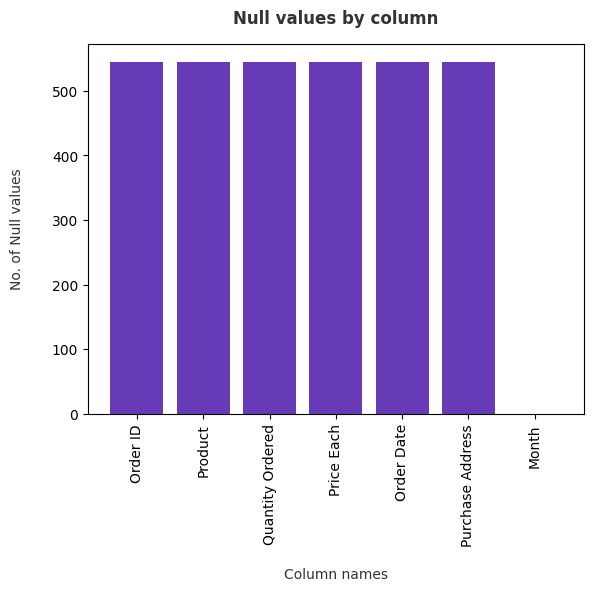

In [5]:
isna_df = df.isna().sum()
fig, ax = plt.subplots()

ax.bar(isna_df.index, isna_df.values, color='#673AB7')

ax.set_xticks(isna_df.index)
ax.set_xticklabels(isna_df.index,rotation='vertical')

ax.set_ylabel('No. of Null values',  labelpad=20, color='#333333')
ax.set_xlabel('Column names',  labelpad=15, color='#333333')
ax.set_title('Null values by column',  pad=15, color='#333333', weight='bold')

plt.show()

- Removed duplicates and null values from the dataframe.
- Cast the columns "Quantity Ordered" and "Price Each" to numbers.
- Created a new column called "Revenue" by multiplying the "Quantity Ordered" and "Price Each" columns to get the total revenue for each order.
- Converted the "Order Date" column to a datetime data type using pandas' "to_datetime" function.
- Created new columns for the hour, minute, and day of the week of each order using pandas' datetime functions.


#### 1.3 Cleaning the dataset

In [6]:
df = df.dropna()
df = df[~(df['Order Date'] == 'Order Date')]

In [7]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df.insert(7, 'Revenue', df['Quantity Ordered'] * df['Price Each'])

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df.insert(5, 'Hour', df['Order Date'].dt.hour)

In [10]:
df.insert(6, 'Minute', df['Order Date'].dt.minute)

In [11]:
df.insert(5, 'Day in Week', df['Order Date'].dt.dayofweek)

In [12]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Day in Week,Hour,Minute,Purchase Address,Month,Revenue
109197,245456,AAA Batteries (4-pack),1,2.99,2019-08-07 00:12:00,2,0,12,"353 Park St, Portland, OR 97035",8,2.99
113588,249634,USB-C Charging Cable,1,11.95,2019-09-16 14:23:00,0,14,23,"989 Washington St, San Francisco, CA 94016",9,11.95
155245,289438,USB-C Charging Cable,1,11.95,2019-11-28 20:09:00,3,20,9,"535 Lakeview St, New York City, NY 10001",11,11.95
84851,222176,Lightning Charging Cable,1,14.95,2019-06-13 17:47:00,3,17,47,"172 Spruce St, Los Angeles, CA 90001",6,14.95
73921,211690,Lightning Charging Cable,1,14.95,2019-06-25 21:59:00,1,21,59,"955 6th St, Boston, MA 02215",6,14.95


### 2. Revenue by Month in 2019
- Grouped data by month and calculated total revenue
- Created bar plot showing revenue by month
- Formatted plot with x-axis labels and tick marks, y-axis grid, and removed spines

In [13]:
df1 = df.copy()
df1.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Day in Week         0
Hour                0
Minute              0
Purchase Address    0
Month               0
Revenue             0
dtype: int64

In [14]:
df1.groupby('Month').agg(Total_Revenue=('Revenue','sum')).sort_values(by='Total_Revenue', ascending=False).head()

,Total_Revenue
Month,
12,4619297.12
10,3736884.05
4,3396059.11
11,3198909.23
5,3144584.80


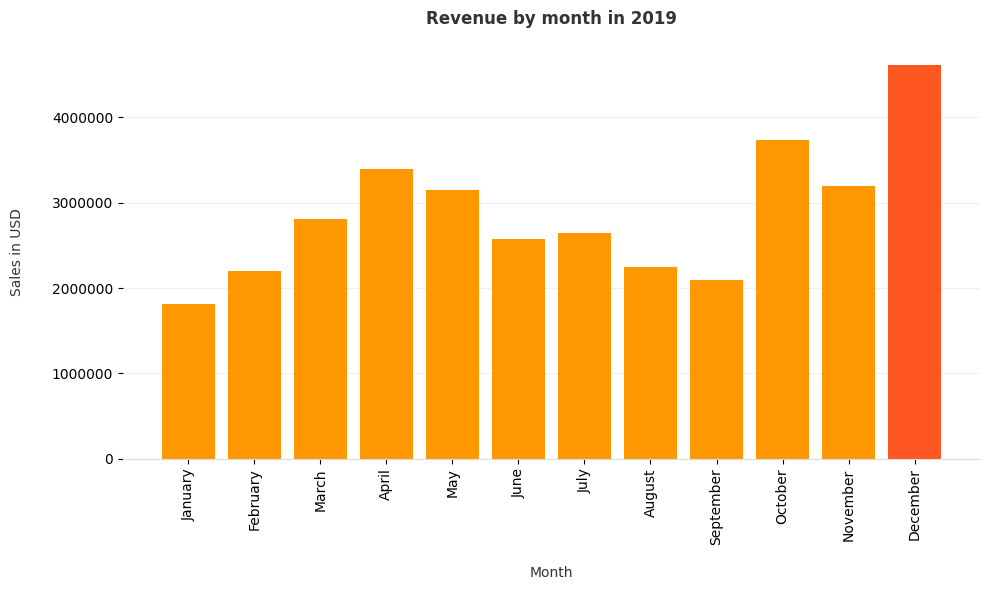

In [15]:
revenue = df1.groupby('Month').agg(Total_Revenue=('Revenue','sum'))
values = list(revenue['Total_Revenue'])
months_num= revenue.index
colors = ['#FF5722' if value == max(values) else '#FF9800' for value in values]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(months_num, values, color=colors)
ax.set_xticks(months_num)
ax.set_xticklabels(months,rotation='vertical')
ax.ticklabel_format(axis='y', style='plain')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')


ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


ax.set_ylabel('Sales in USD',  labelpad=20, color='#333333')
ax.set_xlabel('Month',  labelpad=15, color='#333333')
ax.set_title('Revenue by month in 2019',  pad=15, color='#333333', weight='bold')
fig.tight_layout()
plt.show()

- **Interesting Insights:**
    - The graph highlights the importance of tracking sales by month, as this data can provide insights into sales patterns and   revenue trends over time
    - The graph shows that revenue was highest in December, likely due to holiday shopping.
    - The lowest revenue was in January, which is expected since it is a slow shopping month after the holiday season.

### 3. Average Sale by Month
   - Grouped the data by month and calculated the average revenue for each month.
   - Created a line graph with the month on the x-axis and the average revenue on the y-axis.
   - Added x-axis labels for each month and rotated them vertically.
   - Added a title to the graph and removed the top, right and left spines to keep the focus on the data.
   - Added horizontal grid lines to help read the values.

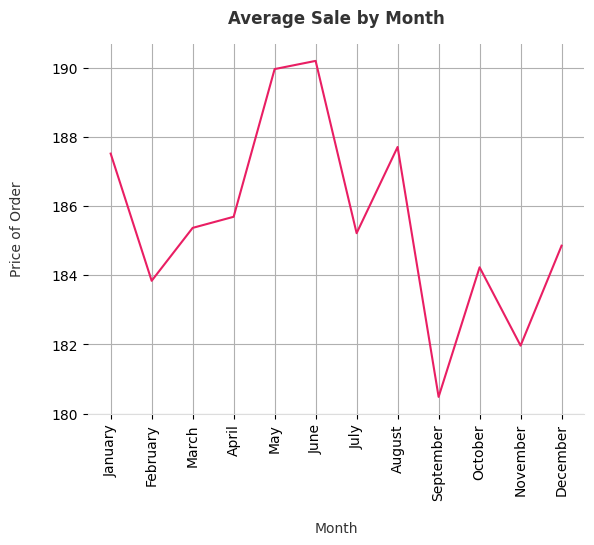

In [16]:
grouped = df.groupby('Month')['Revenue'].mean()
fig, ax = plt.subplots()


ax.plot(grouped.index, grouped.values, color='#E91E63')


ax.set_xticks(grouped.index)
ax.set_xticklabels(months, rotation='vertical')
ax.set_ylabel('Price of Order',  labelpad=20, color='#333333')
ax.set_xlabel('Month',  labelpad=15, color='#333333')
plt.title('Average Sale by Month', pad=15, color='#333333', weight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.grid(True)
plt.show()

- **Interesting Insights:**
    - The average revenue increases in the summer months and decreases in the autumn months, picking up again in winter months.


- **Possible Questions to Ask:**
    - What are the most popular products during the months with the highest and lowest average revenue?
    - Is there a correlation between website traffic and revenue during the different months of the year?

### 4. Total Revenue by city in 2019
- Extracted city and state from the 'Purchase Address' column using the `get_city` and `get_state` functions, respectively.
- Grouped the data by city and calculated the total revenue for each city in 2019.
- Created a pie chart showing the distribution of revenue across the top 10 cities in the dataset.

In [17]:
def get_city(address):
    return address.split(',')[1].strip()
def get_state(address):
    return address.split(',')[2].strip()[:2]


city = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
df.insert(6, 'City', city)

In [18]:
df['City'].value_counts()

San Francisco (CA)    44732
Los Angeles (CA)      29605
New York City (NY)    24876
Boston (MA)           19934
Atlanta (GA)          14881
Dallas (TX)           14820
Seattle (WA)          14732
Portland (OR)         10010
Austin (TX)            9905
Portland (ME)          2455
Name: City, dtype: int64

In [19]:
revenue_by_city = df.groupby('City').agg(Total_Revenue=('Revenue', 'sum')).sort_values(by='Total_Revenue', ascending=False)

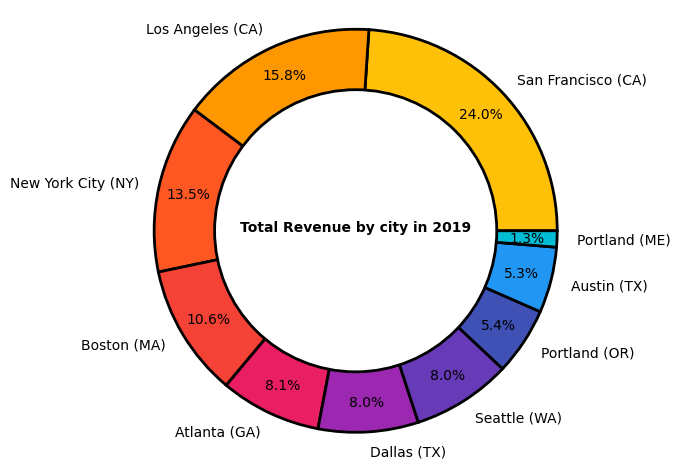

In [20]:
x = list(revenue_by_city.index)
y = list(revenue_by_city['Total_Revenue'])
colors = ["#FFC107", "#FF9800", "#FF5722", "#F44336", "#E91E63", "#9C27B0", "#673AB7", "#3F51B5", "#2196F3", "#00BCD4"]
wedge_properties = {"edgecolor":"k",'linewidth': 2}

fig, ax = plt.subplots()
ax.pie(y, labels=x, autopct='%1.1f%%',  pctdistance=0.85, colors=colors, wedgeprops=wedge_properties)

center_x, center_y = np.mean([w.center for w in ax.patches], axis=0)

# Plot the text at the center of the pie chart
plt.text(center_x, center_y, "Total Revenue by city in 2019", fontsize=10, fontweight='bold', ha='center')
centre_circle = plt.Circle((0,0),0.70,fc='white', edgecolor="black", linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()

plt.show()

- **Interesting Insights:**
    - The top three cities by revenue were San Francisco (CA), New York City (NY), and Los Angeles (CA), which together accounted for over half of the total revenue in 2019. <br>

- **Possible Questions to Ask:**

    - Which cities generated the most revenue for the company in 2019?
    - Are there any factors that might explain the differences in revenue across cities, such as population size, economic activity, or demographics?
    - Are there any opportunities for the company to increase its revenue in certain cities based on the data?

### 5. Average Sale by City
   - Created a line graph of the average sale by city.
   - Used the groupby method to group the data by city and calculated the mean revenue for each city.
   - Plotted the cities on the x-axis and the average sale on the y-axis.

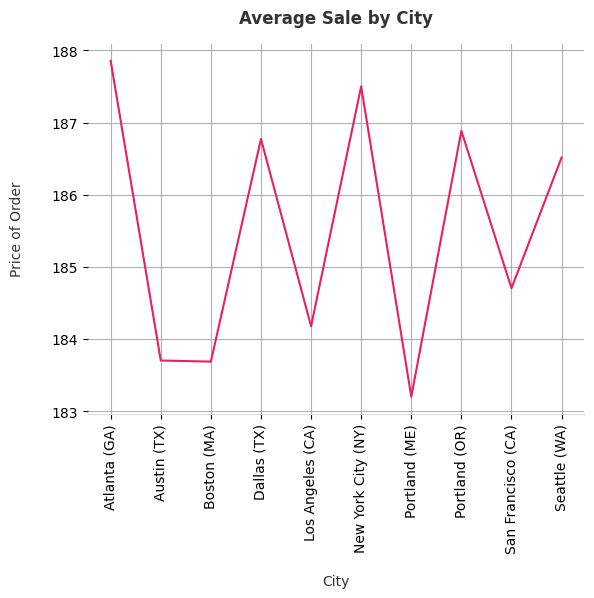

In [21]:
grouped = df.groupby(['City'])['Revenue'].mean()
fig, ax = plt.subplots()


ax.plot(grouped.index, grouped.values, color='#E91E63')


ax.set_xticks(grouped.index)
ax.set_xticklabels(grouped.index, rotation='vertical')
ax.set_ylabel('Price of Order',  labelpad=20, color='#333333')
ax.set_xlabel('City',  labelpad=15, color='#333333')
plt.title('Average Sale by City', pad=15, color='#333333', weight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.grid(True)
plt.show()

- **Interesting Insights:**
    - The average sale in Atlanta is the highest among all cities.
    - The average sales in New York and Portlan (OR) are also high compared to other cities.
    - The average sale in Portlan(ME) is the lowest among all cities.


- **Possible Questions to Ask:**
     - What is the standard deviation of the revenue for each city?
     - Are there any patterns in the revenue based on the location of the city (e.g., coastal cities vs. inland cities)?
     - Do certain products sell better in certain cities, leading to higher revenue?

### 6. Revenue by product
   - Grouped the data by Product and Price Each and calculated the total revenue for each combination using the sum method.
   - Created a scatter plot with Product on the x-axis, revenue on the y-axis, and the size of the scatter points representing the Price Each of the product.
   - Used a color map to indicate the Price Each of the product, and added a color bar to the right of the graph.

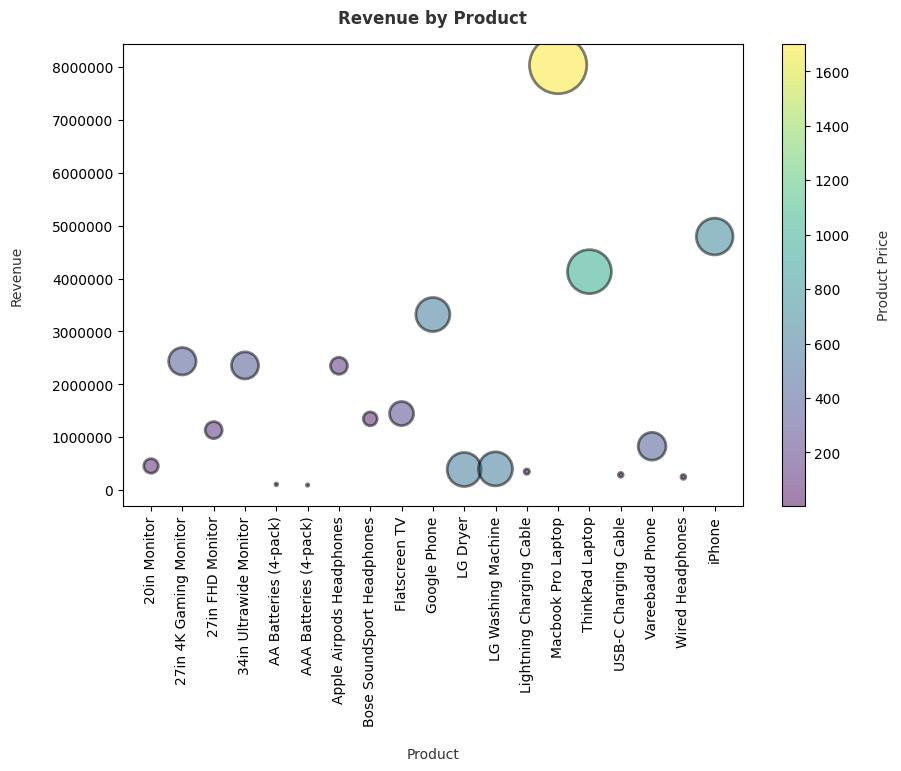

In [22]:
grouped_data = df.groupby(['Product', 'Price Each'])['Revenue'].sum()
fig, ax = plt.subplots(figsize=(10, 6))

products_name = grouped_data.index.get_level_values(0).to_list()
prices = grouped_data.index.get_level_values(1).to_list()

scatters = ax.scatter(products_name, grouped_data.values, s=prices, c=prices, alpha=0.5, edgecolor='black', lw=2, cmap="viridis")
cbar = plt.colorbar(scatters)
cbar.set_label('Product Price',  labelpad=20, color='#333333')

ax.set_xlabel('Product',  labelpad=15, color='#333333')
ax.set_ylabel('Revenue',  labelpad=20, color='#333333')
plt.xticks(rotation=90)
plt.title('Revenue by Product', pad=15, color='#333333', weight='bold')
ax.ticklabel_format(axis='y',style='plain')
plt.show()

- **Interesting Insights:**
     - The most expensive products generate the most revenue, with the largest scatter points belonging to the most expensive products.
     - There are some products with a lower price that generate a similar amount of revenue to the more expensive products, potentially indicating a high demand for those products.
     - There are some products with a high price that generate a relatively low amount of revenue, indicating that they may have a low demand despite their high price.

- **Possible Questions to Ask:**
     - Are there any products with a particularly high or low profit margin?
     - How do the revenue and price distributions compare between different product categories?
     - Are there any products with a high price that have a low order frequency?

### 7. Most Ordered Products
This code groups the data by product and calculates the total quantity ordered for each product, as well as the average price for each product. It then creates a list of all the product names.

- The total quantity ordered is shown in the vertical bar chart (in bold purple).
- The average price is shown as a line chart (in bold yellow).
- The x-axis shows the names of the products.
- The y-axes show the total quantity ordered and the average price, respectively.

In [23]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

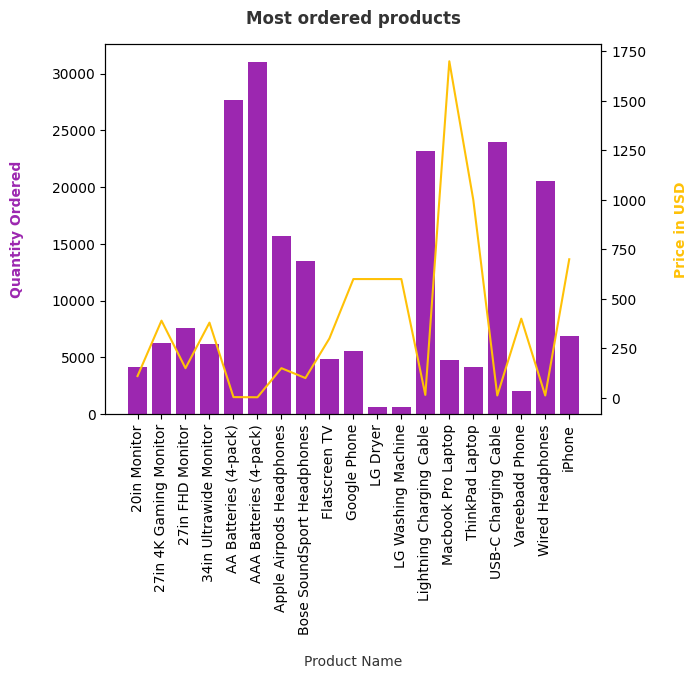

In [24]:
prices = df.groupby('Product')['Price Each'].mean()
products = [product for product, d in product_group]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='#9C27B0')
ax2.plot(products, prices, color='#FFC107')

plt.title('Most ordered products',  pad=15, color='#333333', weight='bold')
ax1.set_xlabel('Product Name',  labelpad=15, color='#333333')
ax1.set_ylabel('Quantity Ordered', labelpad=20, color='#9C27B0', weight='bold')
ax2.set_ylabel('Price in USD',  labelpad=20, color='#FFC107', weight='bold')
ax1.set_xticks(products)
ax1.set_xticklabels(products,rotation='vertical')
plt.show()

- **Interesting Insights:**
    - The most ordered products are batteries, cables, chargers, and headphones.
    - The most ordered products have the cheapest price

- **Possible Questions to Ask:**
    - What factors influence the popularity of a product?
    - Are there certain products that are more likely to be purchased together?
    - How do the prices of different products affect their sales?

### 8. Most common products bought together

To analyze the most common products bought together, the data is filtered to select only those rows which have duplicate Order IDs. A new column 'Grouped' is added to combine all the products bought together in a single cell for each Order ID.

The products in the 'Grouped' column are counted and stored in a dictionary with their frequency. The products and their corresponding counts are then sorted in decreasing order of frequency and the top 10 most commonly bought products are selected for analysis.

The results are displayed using a horizontal bar chart with the 10 most commonly bought products on the y-axis and their corresponding frequencies on the x-axis. The bar color is set to blue for the product with the highest frequency and to light blue for the remaining products.

In [25]:
#Find duplicated order id 
df1 = df[df['Order ID'].duplicated(keep=False)].copy()
df1.shape

(14649, 12)

In [26]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [27]:
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()

In [28]:
products_count = {}
for products in df1['Grouped']:
    if products in products_count:
        products_count[products] +=1
    else:
         products_count[products.strip()] = 1
products_count = sorted(products_count.items(), key=lambda x:x[1], reverse=True)

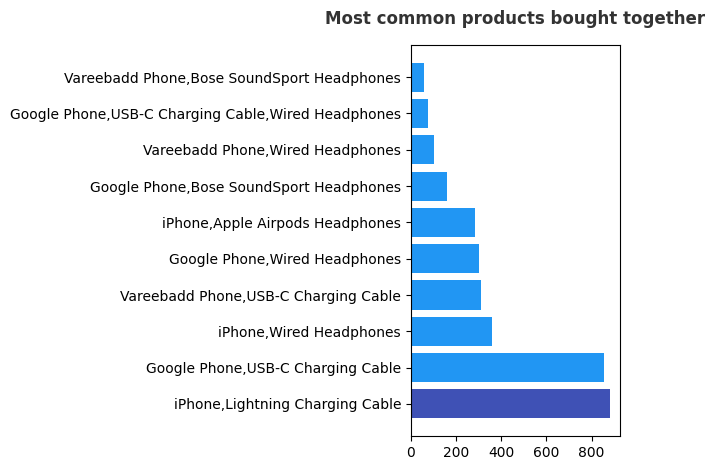

In [29]:
products_count = dict(products_count)
products, quantity = list(products_count.keys()), list(products_count.values())
colors = ["#3F51B5" if value == max(quantity) else '#2196F3' for value in quantity]

fig, ax = plt.subplots()
ax.barh(products[:10], quantity[:10], color=colors)
plt.title('Most common products bought together', pad=15, color='#333333', weight='bold')

plt.tight_layout()
plt.show()

- **Interesting Insights:**
- This graph provides insights into the most commonly bought products and can be used to improve marketing and sales   strategies. Companies can use this data to create bundles or offers for the most commonly bought products and incentivize customers to purchase them together.

- **Possible Questions to Ask:**
- Which products are most commonly bought together?
- Can we create a bundle or offer for these products to incentivize customers to purchase them together?

### 9. Orders through 24 hours
- Created a line graph of the number of orders placed through 24 hours based on year of data.
    - Used the `groupby` method to group the data by hour and counted the number of orders for each hour.
    - Plotted the hours on the x-axis and the count of orders on the y-axis.
    - Added markers on the line for each hour.


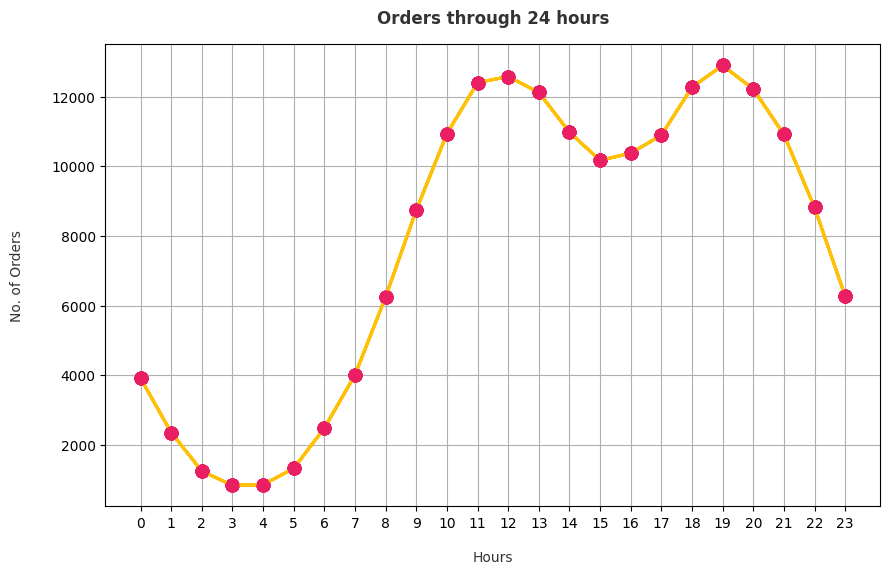

In [30]:
hours = [hour for hour, d in df.groupby('Hour')]
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hours, df.groupby('Hour').count(), linestyle='-',color='#FFC107', marker='.', markersize=20, linewidth=2, markerfacecolor='#E91E63', markeredgecolor='none')

ax.set_xticks(hours)
ax.set_ylabel('No. of Orders',  labelpad=20, color='#333333')
ax.set_xlabel('Hours',  labelpad=15, color='#333333')

plt.title('Orders through 24 hours', pad=15, color='#333333', weight='bold')
plt.grid(True)
plt.show()

- **Interesting Insights:**
    - The peak hours for orders are around 11 am and 7 pm.
    - The lowest number of orders occurs during the early morning hours, around 4 am.
    - There is a slight increase in orders during the afternoon hours before peaking again in the evening.

- **Possible Questions to Ask:**
    - What is the average number of orders per hour?
    - Are there any significant changes in order patterns on weekends compared to weekdays?
    - Do different products have different ordering patterns throughout the day?

### 10. Most popular days for buying and ordering
- Used the groupby method to group the data by month and day of the week.
- Calculated the total revenue and number of unique orders for each day in each month.
- Found the day of the week with the highest revenue and the day with the most orders for each month.
- Counted the occurrences of each day for both the highest revenue and the most orders.
- Plotted the number of days on the y-axis and the days of the week on the x-axis.
- Added two bars for each day: one showing the number of days with the highest revenue and one showing the number of days with the most orders.
- Used different colors for each bar to differentiate between revenue and orders.

In [31]:
grouped_revenue = df.groupby(['Month', 'Day in Week'])['Revenue'].sum()
grouped_order = df.drop_duplicates(subset='Order ID')
grouped_order = grouped_order.groupby(['Month', 'Day in Week'])['Order ID'].count()
max_revenue = grouped_revenue.groupby(level=0).idxmax()
max_orders = grouped_order.groupby(level=0).idxmax()
days_count = {}
for month, day in max_revenue:
    if day in days_count:
        days_count[day] += 1
    else:
        days_count[day] = 1
days= {}
for month, day in max_orders:
    if day in days:
        days[day] += 1
    else:
        days[day] = 1
days_count = dict(sorted(days_count.items()))
days = dict(sorted(days.items()))

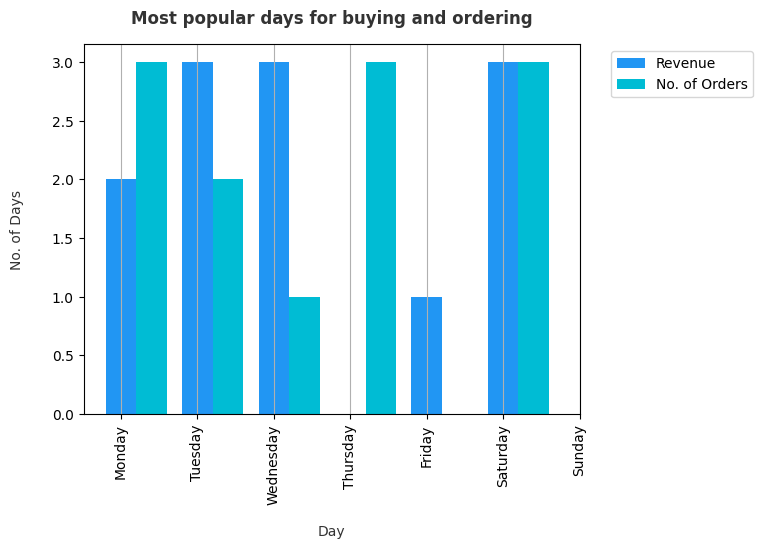

In [32]:
fig, ax = plt.subplots()
da = np.array( [int(x) for x in days_count.keys()])
d = np.array( [int(x) for x in days.keys()])
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

width = 0.4
ax.bar(da, days_count.values(), width=width, label='Revenue', color='#2196F3')
ax.bar(d + width, days.values(), width = width, label='No. of Orders', color='#00BCD4')

ax.set_ylabel('No. of Days',  labelpad=20, color='#333333')
ax.set_xlabel('Day',  labelpad=15, color='#333333')
ax.set_xticks([i for i in range(0, 7)])
ax.set_xticklabels(weekdays,rotation='vertical')
ax.set_title('Most popular days for buying and ordering',  pad=15, color='#333333', weight='bold')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.xaxis.grid(True)

plt.show()


- **Interesting Insights:**
    - The most popular days for buying are Tuesday, Wednesday and Saturday
    - Sunday is the least popular day for both buying and ordering.

- **Possible Questions to Ask:**
    - Are there any significant changes in the popularity of certain days throughout the year?
    - What are the reasons behind the difference in popularity between buying and ordering on Wednesday compared to other days of the week?
    - Are there any trends in the types of products that are more popular on certain days of the week?